In [1]:
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px
import time
import geopandas as gpd
import seaborn as sns
from pprint import pprint

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [2]:
Edu_csv_path = Path("../Data/Higher_Ed.csv")
home_Owner_path = Path("../Data/Homeownership_Rate.csv")


Higher_Ed_df = pd.read_csv(Edu_csv_path, encoding="utf-8")
home_Ownership_df=pd.read_csv(home_Owner_path, encoding="utf-8")
Higher_Ed_df.to_csv('Cleaned_Data/Complete_Higher_Ed.csv', index=False)



In [3]:

# Convert the Date index to a column
Higher_Ed_df = Higher_Ed_df.reset_index()

# Check the columns again
print("Columns after resetting the index:", Higher_Ed_df.columns.tolist())

# Now that Date is a column, we can convert it to datetime and set it back as the index if needed
Higher_Ed_df['Date'] = pd.to_datetime(Higher_Ed_df['Date'], errors='coerce')

# Set 'Date' as the index again if necessary
Higher_Ed_df.set_index('Date', inplace=True)

usa_education_data = round(Higher_Ed_df.mean(axis=1),1)

# Optionally, create a DataFrame to store it with 'Date' as a column
usa_education_df = usa_education_data.reset_index()
usa_education_df.columns = ['Date', 'US Avg. Higher Edu']

# Display the result
usa_education_df.head()


Columns after resetting the index: ['index', 'Date', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


,Date,US Avg. Higher Edu
0,2006-01-01,26.2
1,2007-01-01,26.6
2,2008-01-01,26.9
3,2009-01-01,27.1
4,2010-01-01,27.5


In [4]:



US_homeownership_df = home_Ownership_df[['Date', 'United States']].copy()
US_homeownership_df.head()
usa_education_df['Date'] = pd.to_datetime(usa_education_df['Date'], errors='coerce')
US_homeownership_df['Date'] = pd.to_datetime(US_homeownership_df['Date'], errors='coerce')

# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(usa_education_df, US_homeownership_df, on='Date', how='inner')
merged_df.rename(columns={'United States': 'US Homeownership'}, inplace=True)

merged_df.to_csv('Cleaned_Data/MergedMean.csv', index=False)
US_homeownership_df.to_csv('Cleaned_Data/Homeownership_mean.csv', index=False)
usa_education_df.to_csv('Cleaned_Data/Higher_Ed_mean.csv', index=False)
home_Ownership_df.to_csv('Cleaned_Data/Complete_home_Ownership.csv', index=False)


In [5]:
Higher_Ed_df = pd.read_csv(Edu_csv_path, encoding="utf-8")
home_Ownership_df=pd.read_csv(home_Owner_path, encoding="utf-8")
Higher_Ed_df.to_csv('Cleaned_Data/Complete_Higher_Ed.csv', index=False)


Higher_Ed_df.head(2)

# Convert the Date index to a column
Higher_Ed_df = Higher_Ed_df.reset_index()

# Check the columns again
print("Columns after resetting the index:", Higher_Ed_df.columns.tolist())

# Now that Date is a column, we can convert it to datetime and set it back as the index if needed
Higher_Ed_df['Date'] = pd.to_datetime(Higher_Ed_df['Date'], errors='coerce')

# Set 'Date' as the index again if necessary
Higher_Ed_df.set_index('Date', inplace=True)

usa_education_data = round(Higher_Ed_df.mean(axis=1),1)

# Optionally, create a DataFrame to store it with 'Date' as a column
usa_education_df = usa_education_data.reset_index()
usa_education_df.columns = ['Date', 'US Avg. Higher Edu']

# Display the result
usa_education_df.head()



US_homeownership_df = home_Ownership_df[['Date', 'United States']].copy()
US_homeownership_df.head()
usa_education_df['Date'] = pd.to_datetime(usa_education_df['Date'], errors='coerce')
US_homeownership_df['Date'] = pd.to_datetime(US_homeownership_df['Date'], errors='coerce')

# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(usa_education_df, US_homeownership_df, on='Date', how='inner')
merged_df.rename(columns={'United States': 'US Homeownership'}, inplace=True)

merged_df
merged_df.to_csv('Cleaned_Data/MergedMean.csv', index=False)
US_homeownership_df.to_csv('Cleaned_Data/Homeownership_mean.csv', index=False)
usa_education_df.to_csv('Cleaned_Data/Higher_Ed_mean.csv', index=False)
home_Ownership_df.to_csv('Cleaned_Data/Complete_home_Ownership.csv', index=False)


Columns after resetting the index: ['index', 'Date', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [6]:
Clean_Data_df = pd.read_csv("../Work_Hawa/Cleaned_Data/MergedMean.csv")
HomeOwnerShip_Data_df=pd.read_csv("../Work_Hawa/Cleaned_Data/Complete_home_Ownership.csv")
HomeOwnerShip_Mean_df=pd.read_csv("../Work_Hawa/Cleaned_Data/Homeownership_mean.csv")
Higher_Edu_Mean_df=pd.read_csv("../Work_Hawa/Cleaned_Data/Higher_Ed_mean.csv")
Higher_Edu_Data_df = pd.read_csv("../Work_Hawa/Cleaned_Data/Complete_Higher_Ed.csv")


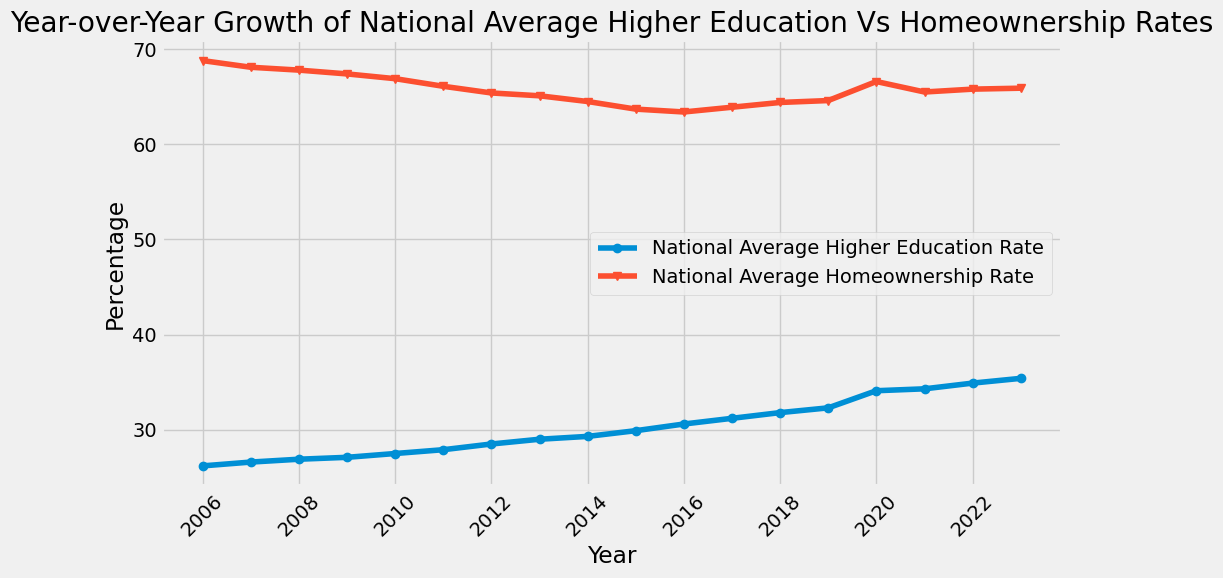

In [7]:
Clean_Data_df['Date'] = pd.to_datetime(Clean_Data_df['Date'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(Clean_Data_df['Date'], Clean_Data_df['US Avg. Higher Edu'], label='National Average Higher Education Rate', marker='o')
plt.plot(Clean_Data_df['Date'], Clean_Data_df['US Homeownership'], label='National Average Homeownership Rate', marker='v')

# Adding labels and title
plt.title('Year-over-Year Growth of National Average Higher Education Vs Homeownership Rates')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


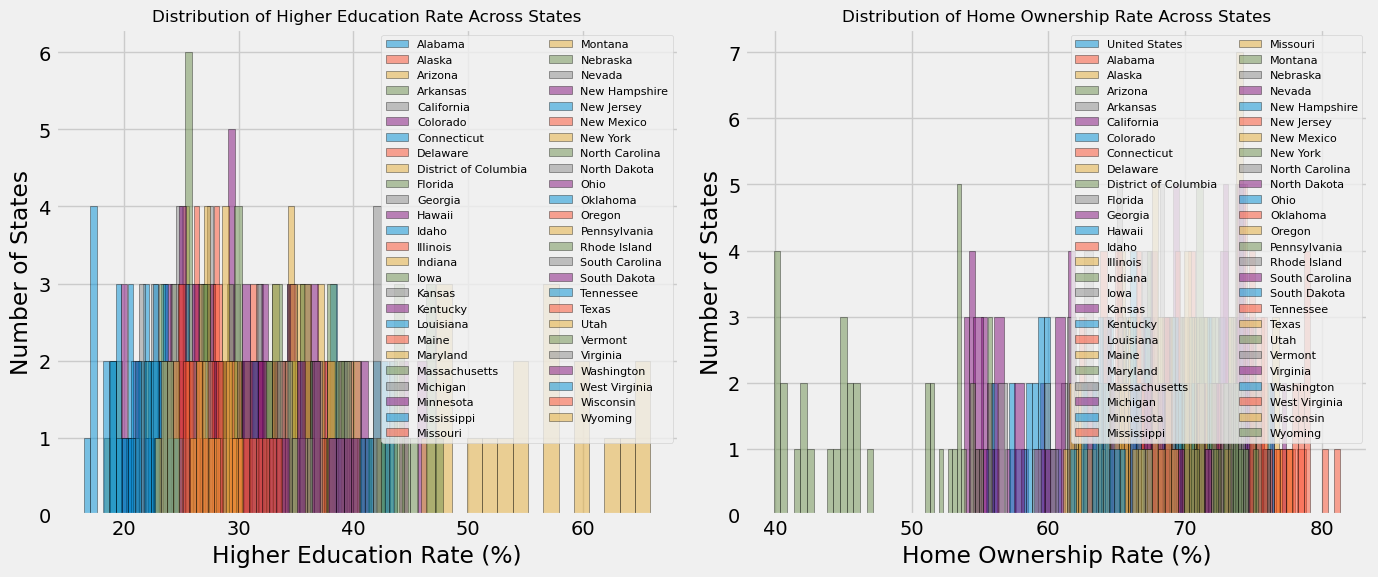

In [8]:
# Defining figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Higher Education Rate Distribution
states = Higher_Edu_Data_df.columns[1:]  # Exclude 'Date' or the index column
for state in states:
    ax1.hist(
        Higher_Edu_Data_df[state],
        bins=15,
        alpha=0.5,
        label=state,
        edgecolor='black'
    )
ax1.set_title('Distribution of Higher Education Rate Across States',fontsize=12)
ax1.set_xlabel('Higher Education Rate (%)')
ax1.set_ylabel('Number of States')
ax1.legend(loc='upper right', fontsize=8, ncol=2)  # Adjust legend for readability

# Home Ownership Rate Distribution
states = HomeOwnerShip_Data_df.columns[1:]  # Exclude 'Date' or the index column
for state in states:
    ax2.hist(
        HomeOwnerShip_Data_df[state],
        bins=15,
        alpha=0.5,
        label=state,
        edgecolor='black'
    )
ax2.set_title('Distribution of Home Ownership Rate Across States',fontsize=12)
ax2.set_xlabel('Home Ownership Rate (%)')
ax2.set_ylabel('Number of States')
ax2.legend(loc='upper right', fontsize=8, ncol=2)  # Adjust legend for readability

plt.tight_layout()
plt.show()


Overall Trend:Higher education

The histogram for states like District of Columbia (DC) show a much larger range, indicating that the higher education rate varies significantly across the years.
States such as California and Florida show relatively stable distributions, where the median line stays in a similar range, indicating consistent higher education rates over time.

Overall Trend:home ownership

Alabama show relatively stable and higher home ownership rates compared to more variable states like California.

In [9]:
summary_stats=Clean_Data_df[['US Avg. Higher Edu', 'US Homeownership']].describe().T

Analysis of Year Over Year Change


Periods of Growth or Decline:

By looking at the peaks - significant growth was seen in 2020

By looking at the troughs - significant decline occurred in 2021 for both higher education or homeownership.

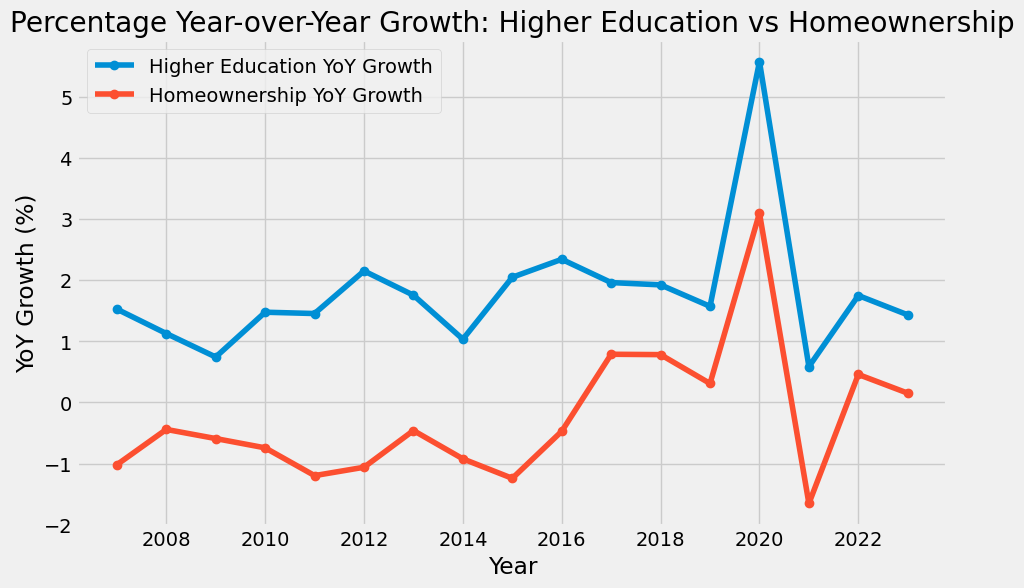

In [10]:
#Percentage Year-over-Year Growth
# Convert Date column to datetime format
Clean_Data_df['Date'] = pd.to_datetime(Clean_Data_df['Date'])

# Extract year from the Date column
Clean_Data_df['Year'] = Clean_Data_df['Date'].dt.year

# Calculate YoY Growth for Higher Education and Homeownership
Clean_Data_df['Higher Edu YoY Growth'] = Clean_Data_df['US Avg. Higher Edu'].pct_change() * 100
Clean_Data_df['Homeownership YoY Growth'] = Clean_Data_df['US Homeownership'].pct_change() * 100

# Plotting the YoY growth for both metrics
plt.figure(figsize=(10, 6))
plt.plot(Clean_Data_df['Year'], Clean_Data_df['Higher Edu YoY Growth'], label='Higher Education YoY Growth', marker='o')
plt.plot(Clean_Data_df['Year'], Clean_Data_df['Homeownership YoY Growth'], label='Homeownership YoY Growth', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.title('Percentage Year-over-Year Growth: Higher Education vs Homeownership')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


US Avg. Higher Education:
Mean: 30.19 (on average, 30.19%)
Standard Deviation (std): 3.03, which indicates moderate variability across years
Min & Max: The range between the minimum (26.2%) and maximum (35.4%) shows fluctuation, with higher education averages varying about 9.2 percentage points.
US Homeownership:
Mean: 65.77 (on average, 65.77%)
Standard Deviation (std): 1.58, showing low variability year over year, indicating relative stability in homeownership rates.
Min & Max: The range between the minimum (63.4%) and maximum (68.8%) is about 5.4 percentage points, indicating a smaller degree of fluctuation compared to higher education rates.

Text(0, 0.5, 'US Avg. rate Homeownership')

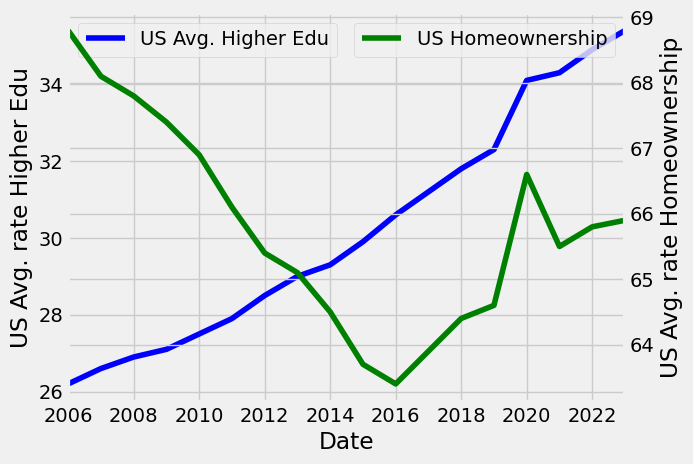

In [11]:
ax = Clean_Data_df.plot(x='Date', y='US Avg. Higher Edu', color='blue', legend=True)
ax2 = ax.twinx()
Clean_Data_df.plot(x='Date', y='US Homeownership', color='green', ax=ax2, legend=True)
ax.set_ylabel("US Avg. rate Higher Edu")
ax2.set_ylabel("US Avg. rate Homeownership")


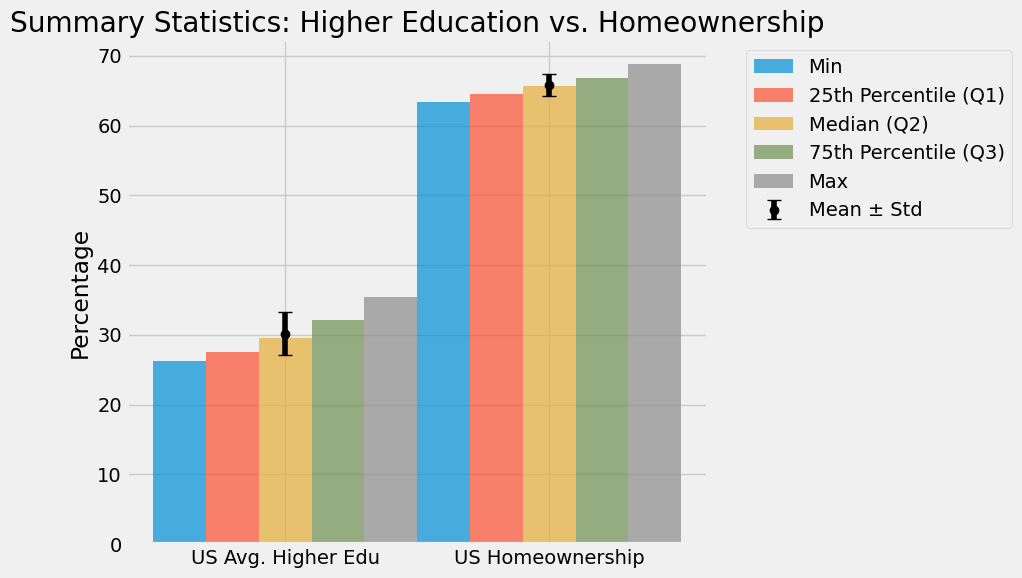

In [12]:
summary_stat = ['US Avg. Higher Edu', 'US Homeownership']
means = [30.194444, 65.772222]
stds = [3.034599, 1.579205]
mins = [26.2, 63.4]
q1s = [27.6, 64.525]
medians = [29.6, 65.65]
q3s = [32.175, 66.825]
maxs = [35.4, 68.8]

# X-axis positions
x = np.arange(len(summary_stat))

# Bar width
bar_width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for different statistics
ax.bar(x - bar_width*2, mins, bar_width, label='Min', alpha=0.7)
ax.bar(x - bar_width, q1s, bar_width, label='25th Percentile (Q1)', alpha=0.7)
ax.bar(x, medians, bar_width, label='Median (Q2)', alpha=0.7)
ax.bar(x + bar_width, q3s, bar_width, label='75th Percentile (Q3)', alpha=0.7)
ax.bar(x + bar_width*2, maxs, bar_width, label='Max', alpha=0.7)

# Add mean as scatter points with error bars for standard deviation
ax.errorbar(x, means, yerr=stds, fmt='o', color='black', label='Mean ± Std', capsize=5)

# Add labels, legend, and title
ax.set_xticks(x)
ax.set_xticklabels(summary_stat)
ax.set_ylabel('Percentage')
ax.set_title('Summary Statistics: Higher Education vs. Homeownership')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.tight_layout()
plt.show()


In [13]:

# Data for calculation
data = {
    "US Avg. Higher Edu": [26.2, 27.6, 29.6, 32.175, 35.4],
    "US Homeownership": [63.4, 64.525, 65.65, 66.825, 68.8]
}

# Calculate quartiles and IQR for each dataset
results = {}
for key, values in data.items():
    q1 = np.percentile(values, 25)  # 25th percentile (Q1)
    q2 = np.percentile(values, 50)  # 50th percentile (Median)
    q3 = np.percentile(values, 75)  # 75th percentile (Q3)
    iqr = q3 - q1                   # Interquartile Range (IQR)
    results[key] = {
        "25th Percentile (Q1)": f"{q1:.2f}%",
        "50th Percentile (Median)": f"{q2:.2f}%",
        "75th Percentile (Q3)": f"{q3:.2f}%",
        "Interquartile Range (IQR)": f"{iqr:.2f}%"
    }

# Display results
import pandas as pd
quartiles_df = pd.DataFrame(results).T
print(quartiles_df)


                   25th Percentile (Q1) 50th Percentile (Median)  \
US Avg. Higher Edu               27.60%                   29.60%   
US Homeownership                 64.53%                   65.65%   

                   75th Percentile (Q3) Interquartile Range (IQR)  
US Avg. Higher Edu               32.17%                     4.57%  
US Homeownership                 66.83%                     2.30%  


US Homeownership
Q1: 64.53%
Q3: 66.83%
IQR: 2.30%
Lower Bound: 61.08%
Upper Bound: 70.28%
Outliers: None. All data points fall within the range 61.08% to 70.28%.


US Avg. Higher Education
Q1: 27.60%
Q3: 32.17%
IQR: 4.57%
Lower Bound: 20.74%
Upper Bound: 39.04%


Outliers: None. All data points fall within the range 20.74% to 39.04%.


Observation:
There are no outliers in either dataset based on the 1.5 × IQR rule.
Both datasets are relatively consistent and fall well within the expected range for their respective measures.

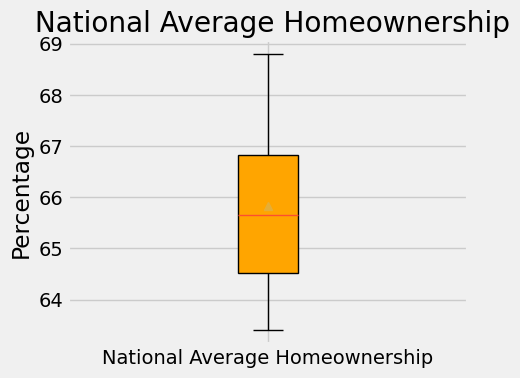

In [14]:

# boxplot
fig, ax = plt.subplots(figsize=(5, 4))
boxplot = ax.boxplot(
    [63.4, 64.525, 65.65, 66.825, 68.8],
    labels=['National Average Homeownership'], 
    patch_artist=True,  # Enables coloring of the boxes
    showmeans=True
)

# Set the color of the boxes to orange
for box in boxplot['boxes']:
    box.set(facecolor='orange')

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_title(' National Average Homeownership')

# Show the plot
plt.tight_layout()
plt.show()




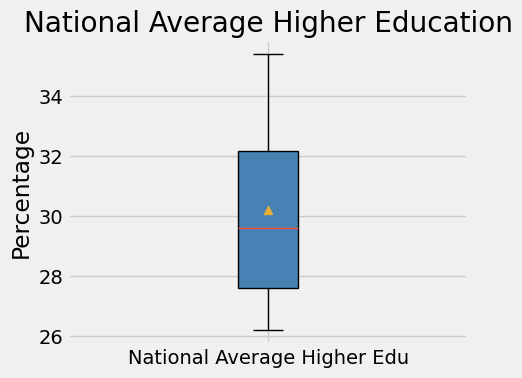

In [15]:

# boxplot
fig, ax = plt.subplots(figsize=(5, 4))
boxplot = ax.boxplot(
    [26.2, 27.6, 29.6, 32.175, 35.4],
    labels=['National Average Higher Edu'], 
    patch_artist=True,  # Enables coloring of the boxes
    showmeans=True
)

# Set the color of the boxes 
for box in boxplot['boxes']:
    box.set(facecolor='steelBlue')

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_title('National Average Higher Education')

# Show the plot
plt.tight_layout()
plt.show()





Key Observations:
No outliers are present in either dataset as all data points fall within the bounds.
US Avg. Higher Edu shows a slightly broader spread, with mild skewness toward higher values.
US Homeownership is more symmetrical and consistent across the data points.

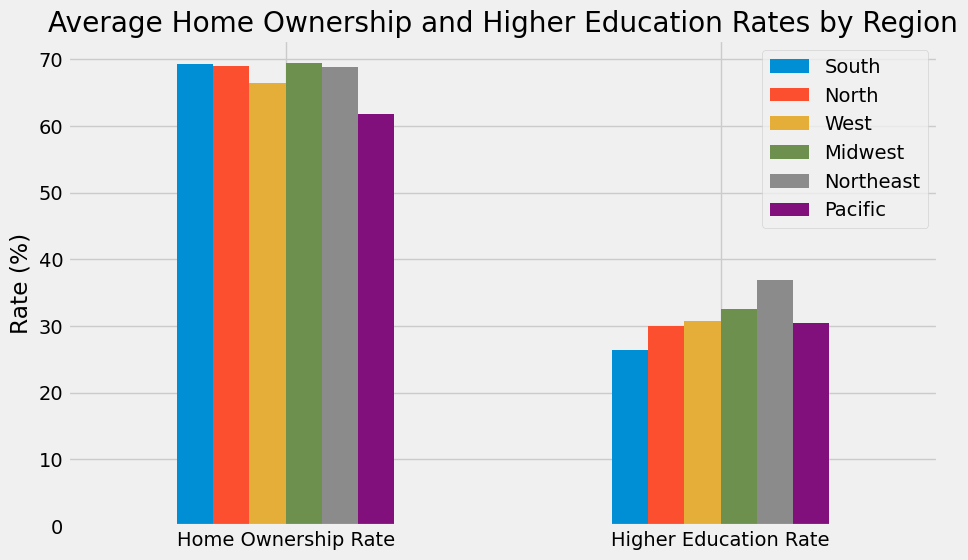

In [16]:
# Full regions mapping with all states
regions = {
    'South': ['Alabama', 'Georgia', 'Florida', 'Texas', 'Louisiana', 'South Carolina', 'North Carolina', 'Tennessee', 'Kentucky', 'Mississippi'],
    'North': ['New York', 'Illinois', 'Pennsylvania', 'Michigan', 'Ohio', 'Indiana', 'Wisconsin', 'Minnesota', 'Iowa', 'Nebraska'],
    'West': ['California', 'Washington', 'Oregon', 'Colorado', 'Arizona', 'Utah', 'Nevada', 'Idaho', 'Montana', 'Wyoming'],
    'Midwest': ['Missouri', 'North Dakota', 'South Dakota', 'Kansas', 'Maine', 'Vermont', 'Rhode Island', 'Connecticut', 'Delaware', 'Maryland'],
    'Northeast': ['New Jersey', 'Massachusetts', 'New Hampshire', 'Maine', 'Connecticut'],
    'Pacific': ['Hawaii', 'Alaska']
}

# Calculate the average home ownership and higher education rates by region
region_avg_homeownership = {}
region_avg_highered = {}

for region, states in regions.items():
    # Exclude any state that doesn't exist in the dataset (e.g., some may not be present in the original data)
    valid_states = [state for state in states if state in HomeOwnerShip_Data_df.columns and state in Higher_Edu_Data_df.columns]
    
    if valid_states:  # Only proceed if there are valid states in both dataframes
        region_avg_homeownership[region] = HomeOwnerShip_Data_df[valid_states].mean(axis=1).mean()
        region_avg_highered[region] = Higher_Edu_Data_df[valid_states].mean(axis=1).mean()

# Create DataFrame for the region comparison
region_comparison = pd.DataFrame({
    'Home Ownership Rate': region_avg_homeownership,
    'Higher Education Rate': region_avg_highered
}).T

# Plotting the bar chart for regional comparison
region_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Average Home Ownership and Higher Education Rates by Region')
plt.ylabel('Rate (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels horizontally
plt.show()


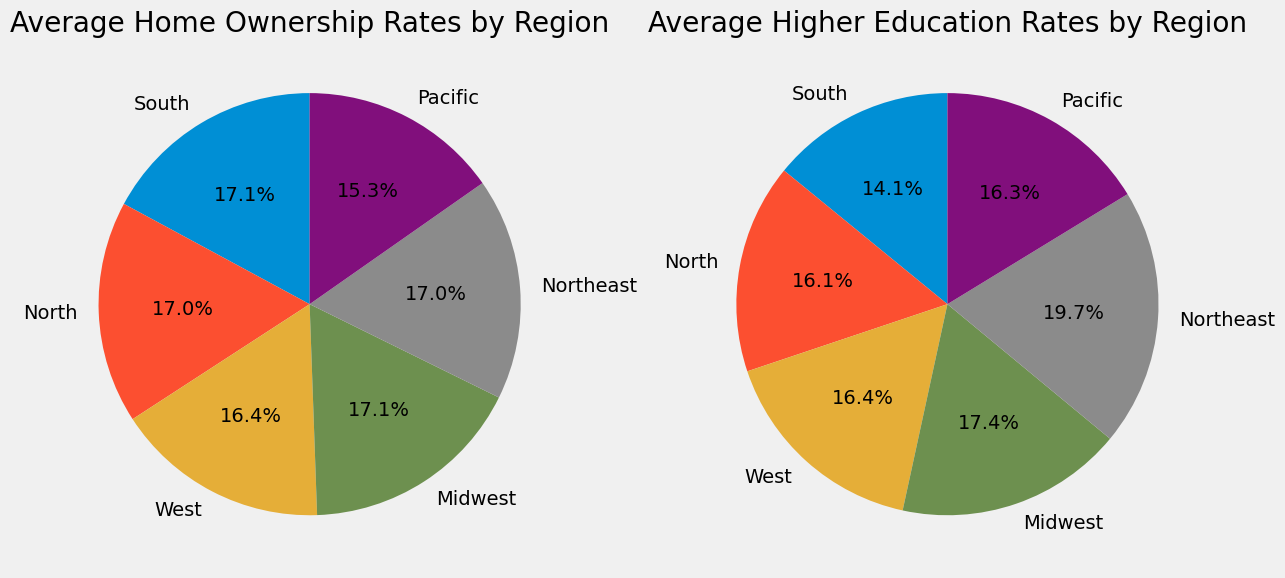

In [17]:
# Calculate the average home ownership and higher education rates by region
region_avg_homeownership = {}
region_avg_highered = {}

for region, states in regions.items():
    # Exclude any state that doesn't exist in the dataset (e.g., some may not be present in the original data)
    valid_states = [state for state in states if state in HomeOwnerShip_Data_df.columns and state in Higher_Edu_Data_df.columns]
    
    if valid_states:  # Only proceed if there are valid states in both dataframes
        region_avg_homeownership[region] = HomeOwnerShip_Data_df[valid_states].mean(axis=1).mean()
        region_avg_highered[region] = Higher_Edu_Data_df[valid_states].mean(axis=1).mean()

# Plotting the pie charts for regional comparison
plt.figure(figsize=(13, 6))

# Home Ownership pie chart
plt.subplot(1, 2, 1)
plt.pie(region_avg_homeownership.values(), labels=region_avg_homeownership.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Average Home Ownership Rates by Region')

# Higher Education pie chart
plt.subplot(1, 2, 2)
plt.pie(region_avg_highered.values(), labels=region_avg_highered.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Average Higher Education Rates by Region')

# Show the pie charts
plt.tight_layout()
plt.show()


Regional Trends:
The South region have higher home ownership rates
The Northeast and West could have higher education rates
Pacific regions show a relatively higher rate of higher education but lower home ownership 